In [9]:
import numpy as np
import pandas as pd
import numpy.random as random
sys.path.insert(0, '../../Libraries')
import JacksonsTSPackage as jts
from statsmodels.tsa.api import VAR

In [10]:
def mul_ten_and_mat(tensor, matrix):
    
    # Makes the block vector
    block_vector = matrix.transpose().reshape(9)

    # Makes the circulant block matrix
    ten_length = len(tensor)
    ten_sqr = ten_length*ten_length
    block_matrix = np.zeros((ten_sqr, ten_sqr))
    for i in range(ten_length):
        for j in range(ten_length):
            x = j * 3
            val = j * 3 + i * 3 
            c = val if val < len(block_matrix) else val - len(block_matrix)
            block_matrix[c:c+3,x:x+3] = tensor[i]

    # Does the multiplication
    result_vector = np.matmul(block_matrix, block_vector)
    result = result_vector.reshape((3,3)).transpose()

    return result

N = 2000
A = np.array([
    [
        [0.8, 0, 0],
        [0, 0.8, 0],
        [0, 0, 0.8]
    ],
    [
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]
    ],
    [
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]
    ]
    ])

T = np.array([
        [1, -1, 1],
        [-1, 1, 1],
        [1, 1, -1]
    ])

tmp = np.array(
    [
        [0.1, 0.2, 0.3],
        [0.4, 0.5, 0.6],
        [0.7, 0.8, 0.9]
    ])

data_tensor = np.zeros((N, 3, 3))
data_tensor[0] = tmp
for i in range(1, N):
    data_tensor[i] = mul_ten_and_mat(A, data_tensor[i-1]) + random.uniform(-1, 1, (3, 3))# + T * i**2 / 500000
data_tensor.shape

(2000, 3, 3)

$$
\begin{pmatrix}
y_{t,11}\\
y_{t,21}\\
y_{t,12}\\
y_{t,22}
\end{pmatrix}
=
\begin{pmatrix}
a_{111}\\
a_{211}\\
a_{112}\\
a_{212}
\end{pmatrix}
y_{t-1,11}
+
\begin{pmatrix}
a_{121}\\
a_{221}\\
a_{122}\\
a_{222}
\end{pmatrix}
y_{t-1,21}
+
\begin{pmatrix}
a_{112}\\
a_{212}\\
a_{111}\\
a_{211}
\end{pmatrix}
y_{t-1,12}
+
\begin{pmatrix}
a_{122}\\
a_{222}\\
a_{121}\\
a_{221}
\end{pmatrix}
y_{t-1,22}
$$

In [11]:
vectorized = pd.DataFrame(jts.tensor_to_vector(data_tensor))
vectorized

,0,1,2,3,4,5,6,7,8
0,0.100000,0.400000,0.700000,0.200000,0.500000,0.800000,0.300000,0.600000,0.900000
1,-0.116313,0.015433,-0.322519,-0.011486,0.574344,1.184896,-0.331888,-0.043155,0.943566
2,-0.160330,-0.980372,-1.240520,0.729701,-0.145051,0.628106,-1.260343,0.758088,1.588913
3,-0.070537,0.184417,-0.172164,0.380355,-1.104132,-0.056801,-0.140867,1.128891,0.980583
4,-0.969073,0.328140,0.096181,0.048794,-0.379111,-0.549278,-0.020410,0.079751,0.898899
...,...,...,...,...,...,...,...,...,...
1995,0.182718,-0.044136,1.867944,-0.341865,0.457838,0.243761,0.685381,-0.103241,-1.170715
1996,0.998765,-0.685516,2.279278,0.234129,-0.230469,0.875095,1.400606,0.488890,-0.295804
1997,1.209501,-0.331061,1.205780,0.619884,-0.812175,0.783598,0.766562,-0.247564,0.337453
1998,0.605870,-0.627789,0.252955,1.039470,-0.430299,0.603957,0.055792,-0.829339,-0.351857


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

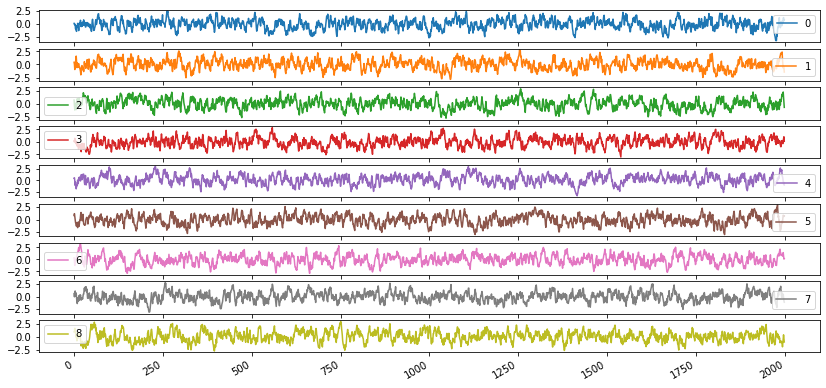

In [12]:
vectorized.plot(figsize = (14, 7), subplots = True)

In [13]:
N_train = 1800
N_test = N - N_train
print(f"N: {N}")
print(f"N_train: {N_train}")
print(f"N_test: {N_test}")

N: 2000
N_train: 1800
N_test: 200


In [14]:
train_tensor = jts.extract_train_tensor(data_tensor, N_train)
test_tensor = jts.extract_test_tensor(data_tensor, N_train, N_test)

In [15]:
train_tensor

array([[[ 0.1       ,  0.2       ,  0.3       ],
        [ 0.4       ,  0.5       ,  0.6       ],
        [ 0.7       ,  0.8       ,  0.9       ]],

       [[-0.11631278, -0.01148576, -0.33188801],
        [ 0.01543316,  0.57434435, -0.04315502],
        [-0.3225185 ,  1.18489605,  0.94356603]],

       [[-0.16033033,  0.72970059, -1.26034347],
        [-0.98037217, -0.14505121,  0.75808788],
        [-1.24051998,  0.62810555,  1.58891311]],

       ...,

       [[-0.37787083,  1.01512867,  0.21052712],
        [ 1.37087802,  1.73837304,  0.15873151],
        [-2.31113406,  0.81262428, -0.07801081]],

       [[-1.01842701,  1.37596205,  1.13490876],
        [ 0.47346937,  0.4380564 ,  0.88304099],
        [-2.53018256,  0.99953302, -0.31357557]],

       [[-1.3370927 ,  1.79563373,  0.48942963],
        [-0.1416445 ,  1.09446121,  0.84112476],
        [-1.62210356, -0.15307035, -1.1079543 ]]])

In [16]:
train_dft = jts.apply_dft_to_tensor(train_tensor)

[ 0.6  -0.15 -0.15] -> [0.1 0.2 0.3]
[ 1.5  -0.15 -0.15] -> [0.4 0.5 0.6]
[ 2.4  -0.15 -0.15] -> [0.7 0.8 0.9]
[-0.45968655  0.05537411  0.05537411] -> [-0.11631278 -0.01148576 -0.33188801]
[ 0.5466225 -0.2501615 -0.2501615] -> [ 0.01543316  0.57434435 -0.04315502]
[ 1.80594359 -1.38674955 -1.38674955] -> [-0.3225185   1.18489605  0.94356603]
[-0.69097321  0.10499111  0.10499111] -> [-0.16033033  0.72970059 -1.26034347]
[-0.3673355  -1.28689051 -1.28689051] -> [-0.98037217 -0.14505121  0.75808788]
[ 0.97649868 -2.34902931 -2.34902931] -> [-1.24051998  0.62810555  1.58891311]
[ 0.16895148 -0.19028099 -0.19028099] -> [-0.07053683  0.38035485 -0.14086654]
[0.20917604 0.17203673 0.17203673] -> [ 0.1844165  -1.1041315   1.12889104]
[ 0.75161812 -0.63405451 -0.63405451] -> [-0.17216363 -0.0568009   0.98058265]
[-0.94068913 -0.98326523 -0.98326523] -> [-0.9690732   0.04879377 -0.0204097 ]
[0.02877983 0.47782005 0.47782005] -> [ 0.32813997 -0.37911074  0.0797506 ]
[ 0.44580209 -0.07862926 -0.0

array([[[ 0.6       , -0.15      , -0.15      ],
        [ 1.5       , -0.15      , -0.15      ],
        [ 2.4       , -0.15      , -0.15      ]],

       [[-0.45968655,  0.05537411,  0.05537411],
        [ 0.5466225 , -0.2501615 , -0.2501615 ],
        [ 1.80594359, -1.38674955, -1.38674955]],

       [[-0.69097321,  0.10499111,  0.10499111],
        [-0.3673355 , -1.28689051, -1.28689051],
        [ 0.97649868, -2.34902931, -2.34902931]],

       ...,

       [[ 0.84778496, -0.99069873, -0.99069873],
        [ 3.26798257,  0.42232575,  0.42232575],
        [-1.57652059, -2.67844079, -2.67844079]],

       [[ 1.4924438 , -2.27386242, -2.27386242],
        [ 1.79456675, -0.18707933, -0.18707933],
        [-1.84422511, -2.87316129, -2.87316129]],

       [[ 0.94797066, -2.47962438, -2.47962438],
        [ 1.79394148, -1.10943748, -1.10943748],
        [-2.88312821, -0.99159123, -0.99159123]]])

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

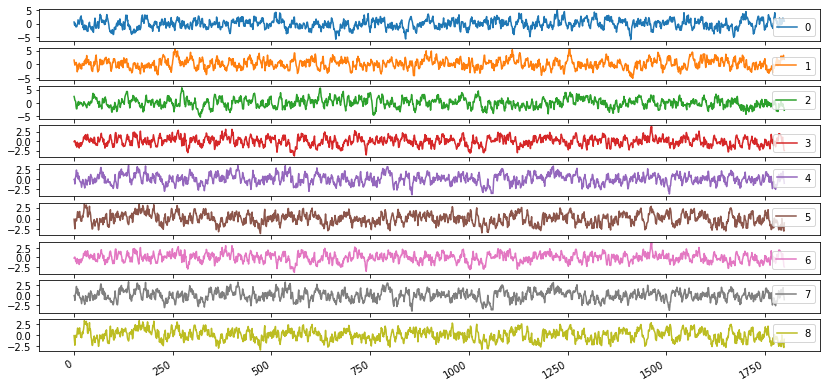

In [17]:
vectorized = pd.DataFrame(jts.tensor_to_vector(train_dft))
vectorized.plot(figsize = (14, 7), subplots = True)

In [19]:
train_model_sets = jts.split_cols_into_model_sets(train_dft, N_train)
test_model_sets = jts.split_cols_into_model_sets(test_tensor, N_test)

array([[ 0.6       ,  1.5       ,  2.4       ],
       [-0.45968655,  0.5466225 ,  1.80594359],
       [-0.69097321, -0.3673355 ,  0.97649868],
       ...,
       [ 0.84778496,  3.26798257, -1.57652059],
       [ 1.4924438 ,  1.79456675, -1.84422511],
       [ 0.94797066,  1.79394148, -2.88312821]])

In [58]:
result_model_sets = np.empty((3, N_test, 3))

In [59]:
models = []
for i in range(3):
    train_df = pd.DataFrame(train_model_sets[i])
    train_df.index = pd.DatetimeIndex(train_df.index).to_period('M')
    train_diff = train_df #.diff().dropna()
    test_df = pd.DataFrame(test_model_sets[i])
    model = VAR(train_diff)
    fit = model.fit(1)
    models.append(fit)
    
    test_df.columns = test_df.columns[:].astype(str)
    results = jts.forecast(fit, train_diff, test_df, N_test, calc_conf = False)
    result_model_sets[i] = results #jts.invert_diff_transformation(results, train_df) 
result_model_sets

array([[[-0.59389164, -2.11988642, -0.19854664],
        [-0.48230847, -1.6670643 , -0.19230865],
        [-0.39281835, -1.3205407 , -0.18834419],
        ...,
        [-0.03805041, -0.18824081, -0.19735486],
        [-0.03805041, -0.18824081, -0.19735486],
        [-0.03805041, -0.18824081, -0.19735486]],

       [[ 0.16970952,  1.62448098, -1.56575729],
        [ 0.13489309,  1.27583454, -1.28349151],
        [ 0.10924001,  1.00470028, -1.0560781 ],
        ...,
        [ 0.05106104,  0.04320361, -0.1276734 ],
        [ 0.05106104,  0.04320361, -0.1276734 ],
        [ 0.05106104,  0.04320361, -0.1276734 ]],

       [[ 0.16970952,  1.62448098, -1.56575729],
        [ 0.13489309,  1.27583454, -1.28349151],
        [ 0.10924001,  1.00470028, -1.0560781 ],
        ...,
        [ 0.05106104,  0.04320361, -0.1276734 ],
        [ 0.05106104,  0.04320361, -0.1276734 ],
        [ 0.05106104,  0.04320361, -0.1276734 ]]])

In [60]:
coef_tensor = np.zeros((3, 3, 3))
for i in range(len(models)):
    ceof = models[i].coefs[0]
    coef_tensor[i,:,:] = ceof
coef_tensor

array([[[ 0.78821186,  0.00316692,  0.01681421],
        [ 0.00728729,  0.76348112, -0.00171201],
        [-0.0248931 ,  0.004066  ,  0.78565916]],

       [[ 0.80833954, -0.0031379 ,  0.00494708],
        [-0.02394269,  0.76997469, -0.01246669],
        [ 0.00541436, -0.01601383,  0.78655927]],

       [[ 0.80833954, -0.0031379 ,  0.00494708],
        [-0.02394269,  0.76997469, -0.01246669],
        [ 0.00541436, -0.01601383,  0.78655927]]])

In [61]:
A

array([[[0.8, 0. , 0. ],
        [0. , 0.8, 0. ],
        [0. , 0. , 0.8]],

       [[0. , 0. , 0. ],
        [0. , 0. , 0. ],
        [0. , 0. , 0. ]],

       [[0. , 0. , 0. ],
        [0. , 0. , 0. ],
        [0. , 0. , 0. ]]])

In [62]:
jts.apply_inverse_dft_to_tensor(coef_tensor)

../../Libraries\JacksonsTSPackage.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  tensor[i][j] = sfft.ifft(dft_tensor[i][j])


array([[[ 0.26939766,  0.2594071 ,  0.2594071 ],
        [ 0.25635214, -0.12453242, -0.12453242],
        [ 0.25494402, -0.13991856, -0.13991856]],

       [[ 0.27004957,  0.26914498,  0.26914498],
        [ 0.24452177, -0.13423223, -0.13423223],
        [ 0.25865327, -0.12661945, -0.12661945]],

       [[ 0.27004957,  0.26914498,  0.26914498],
        [ 0.24452177, -0.13423223, -0.13423223],
        [ 0.25865327, -0.12661945, -0.12661945]]])

In [63]:
result_dft_tensor = jts.collect_result_cols_into_tensor(result_model_sets, N_test)
result_dft_tensor

array([[[-0.59389164,  0.16970952,  0.16970952],
        [-2.11988642,  1.62448098,  1.62448098],
        [-0.19854664, -1.56575729, -1.56575729]],

       [[-0.48230847,  0.13489309,  0.13489309],
        [-1.6670643 ,  1.27583454,  1.27583454],
        [-0.19230865, -1.28349151, -1.28349151]],

       [[-0.39281835,  0.10924001,  0.10924001],
        [-1.3205407 ,  1.00470028,  1.00470028],
        [-0.18834419, -1.0560781 , -1.0560781 ]],

       ...,

       [[-0.03805041,  0.05106104,  0.05106104],
        [-0.18824081,  0.04320361,  0.04320361],
        [-0.19735486, -0.1276734 , -0.1276734 ]],

       [[-0.03805041,  0.05106104,  0.05106104],
        [-0.18824081,  0.04320361,  0.04320361],
        [-0.19735486, -0.1276734 , -0.1276734 ]],

       [[-0.03805041,  0.05106104,  0.05106104],
        [-0.18824081,  0.04320361,  0.04320361],
        [-0.19735486, -0.1276734 , -0.1276734 ]]])

In [64]:
result_tensor = jts.apply_inverse_dft_to_tensor(result_dft_tensor)
result_tensor

array([[[-0.0848242 , -0.25453372, -0.25453372],
        [ 0.37635851, -1.24812247, -1.24812247],
        [-1.11002041,  0.45573688,  0.45573688]],

       [[-0.07084076, -0.20573385, -0.20573385],
        [ 0.29486826, -0.98096628, -0.98096628],
        [-0.91976389,  0.36372762,  0.36372762]],

       [[-0.05811278, -0.16735278, -0.16735278],
        [ 0.22961995, -0.77508033, -0.77508033],
        [-0.76683346,  0.28924464,  0.28924464]],

       ...,

       [[ 0.02135722, -0.02970382, -0.02970382],
        [-0.03394453, -0.07714814, -0.07714814],
        [-0.15090055, -0.02322715, -0.02322715]],

       [[ 0.02135722, -0.02970382, -0.02970382],
        [-0.03394453, -0.07714814, -0.07714814],
        [-0.15090055, -0.02322715, -0.02322715]],

       [[ 0.02135722, -0.02970382, -0.02970382],
        [-0.03394453, -0.07714814, -0.07714814],
        [-0.15090055, -0.02322715, -0.02322715]]])

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

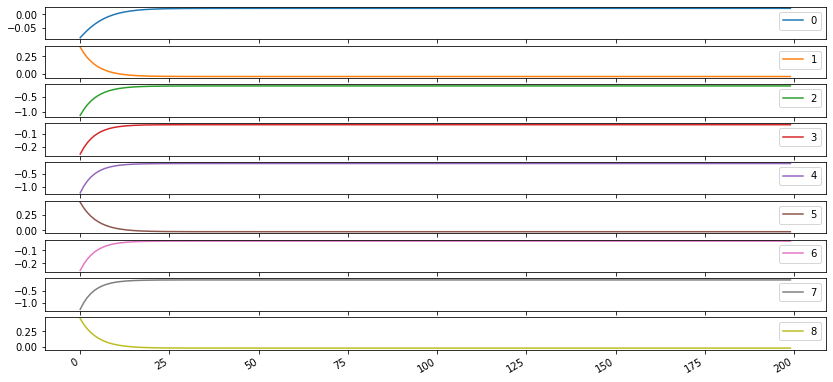

In [65]:
result_vectorized = pd.DataFrame(jts.tensor_to_vector(result_tensor))
result_vectorized.plot(figsize = (14, 7), subplots = True)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

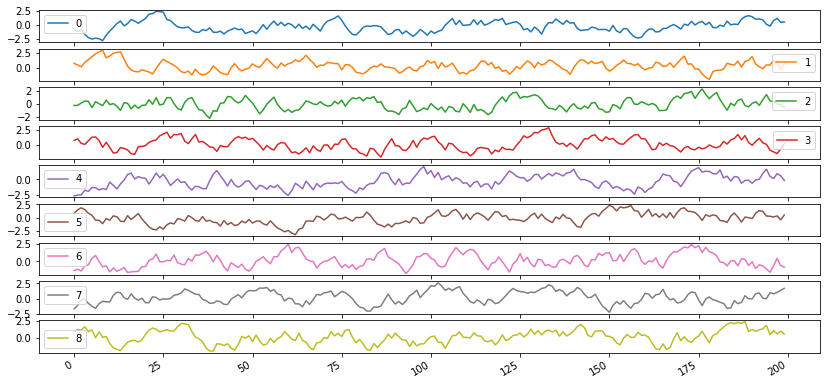

In [66]:
test_vectorized = pd.DataFrame(jts.tensor_to_vector(test_tensor))
test_vectorized.plot(figsize = (14, 7), subplots = True)

In [67]:
error = jts.calc_mape_per_matrix(test_tensor, result_tensor)
error = error.rename(columns={"MAPE": "DFT"})
error

,DFT
0,0.630774
1,0.741796
2,0.837309
3,0.893725
4,0.905909
...,...
195,1.03241
196,1.02394
197,1.02477
198,1.0213


<AxesSubplot:>

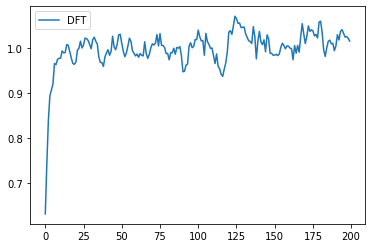

In [68]:
error.plot()

In [69]:
jts.forecast_accuracy(result_vectorized, test_vectorized)

Results
----------------------------------------------------------------------
           ME            MSE            MAE            MAPE
0       0.359          1.130          0.856          117.018%      
1       -0.315         0.854          0.729          102.892%      
2       -0.136         0.727          0.695          169.067%      
3       -0.159         0.962          0.801          102.095%      
4       0.230          1.023          0.849          108.128%      
5       0.130          1.090          0.822          139.173%      
6       -0.162         0.898          0.763          133.000%      
7       -0.296         1.052          0.843          110.221%      
8       -0.164         0.957          0.797          106.758%      
